##### Departamento de Física - Faculdade de Ciências e Tecnologia da Universidade de Coimbra #####
# Física Computacional - Ficha 1 - Interpolação #
### Rafael Isaque Santos - 2012144694 - Licenciatura em Física ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Dados um conjunto de pontos **$x$**, suas respectivas imagens **$y$** e um intervalo de pontos **x_new**:
+ Calculam-se os Coeficientes com o método das diferenças divididas
+ Para cada ponto de **x_new**, aplica-se o polinómio, obtendo os valores de **y_new**.

In [2]:
func_x = lambda x: 1/ (1 + x**2) # Função dada

def xinterval(x_i, x_f, n):
    " Gera um array de 'n' pontos equidistantes entre 'x_i' e 'x_f' "
    xn = np.linspace(x_i, x_f, num = n)
    return xn

def newtoninterp(x, y, x_new):
    """ Dados um conjunto de pontos 'x', suas respectivas imagens 'y', e
    um intervalo de pontos 'x_new' para o qual se vão aplicar o
    polinómios """

    n = len(x)
    
    def difdiv(xi):
        "Cálculo dos coeficientes através do método das diferenças divididas"
        d = list(y)
        for j in range(1, n):
            for i in range (n-1, j-1, -1): # intervalo escolhido de forma a evitar dependências de variáveis no cálculo
                d[i] = (d[i]-d[i-1]) / (xi[i] - xi[i-j]) 
        return d

    def interpol(coef, x_pts, x_new):
        y_new = []
        for pt in x_new:
            co = coef[len(coef)-1] # último coeficiente
            for i in range(n-2, -1, -1): # intervalo para multiplicar do último ponto para o primeiro, sem dependências
                co *= pt - x_pts[i]
                co += coef[i]
            y_new.append(co)
        return y_new
    coef_l = difdiv(x)
    ypol = interpol(coef_l, x, x_new)
    return ypol, coef_l

Nesta figura tenta-se demonstrar a eficácia da rotina, comparando o polinómio com o presente no pdf:

$p(x) = \frac{1042}{63} - \frac{146}{21} x + \frac{7}{36} x^{2} + \frac{5}{21} x^{3} - \frac{5}{252} x^{4}$

Verifica-se que o método está bem implementado, já que os resultados são idênticos.

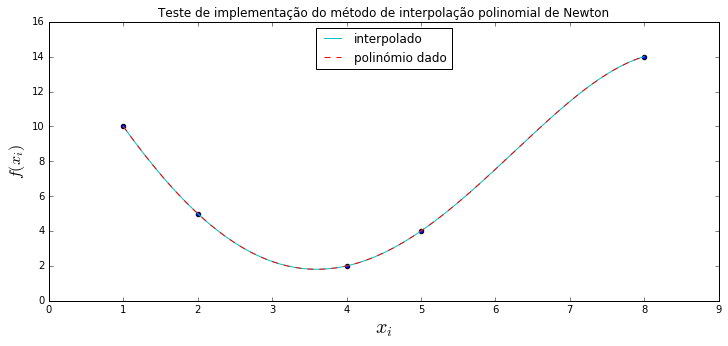

In [3]:
test_x, test_y = [1, 2, 4, 5, 8], [10, 5, 2, 4, 14]
plot_x_range = np.linspace(1, 8, num = 150)
pol_teste, pol_list = newtoninterp(test_x, test_y, plot_x_range)
pol_dado = lambda x: (1042/63) - (146/21)*x + (7/36)*x**2 + (5/21)*x**3 - (5/252)*x**4
plt.figure(figsize=(12, 5))
plt.scatter(test_x, test_y)
plt.plot(plot_x_range, pol_teste, 'c''-', label = 'interpolado')
plt.plot(plot_x_range, pol_dado(plot_x_range), 'r' '--', label = 'polinómio dado')
plt.title('Teste de implementação do método de interpolação polinomial de Newton')
plt.xlabel('$x_{i}$', size=20)
plt.ylabel('$f(x_{i})$', size = 16)
plt.legend(loc='upper center')

plt.show()

Como o método funciona, faz-se a interpolação em grau $n \in [ 1, 2, 3, 4 , 5]$ com $n+1$ pontos equidistantes no intervalo $x \in [-5, 5]$

A verde está representada a função original, $f(x) =\frac{1}{1+x^{2}}$, e a azul o polinómio obtido para cada caso.

Os pontos representados são os requeridos:
[-4.92, -2.67, -1.58, 0.88, 2.22, 3.14, 4.37]

Coeficientes da Interpolação de grau 1:
C0: 0.0384615384615;  C1: 0.0;  
Coeficientes da Interpolação de grau 2:
C0: 0.0384615384615;  C1: 0.192307692308;  C2: -0.0384615384615;  
Coeficientes da Interpolação de grau 3:
C0: 0.0384615384615;  C1: 0.0678733031674;  C2: -0.0101809954751;  C3: 8.67361737988e-19;  
Coeficientes da Interpolação de grau 4:
C0: 0.0384615384615;  C1: 0.0397877984085;  C2: 0.0610079575597;  C3: -0.026525198939;  C4: 0.0053050397878;  
Coeficientes da Interpolação de grau 5:
C0: 0.0384615384615;  C1: 0.0307692307692;  C2: 0.0423076923077;  C3: -0.0153846153846;  C4: 0.00192307692308;  C5: 0.0;  


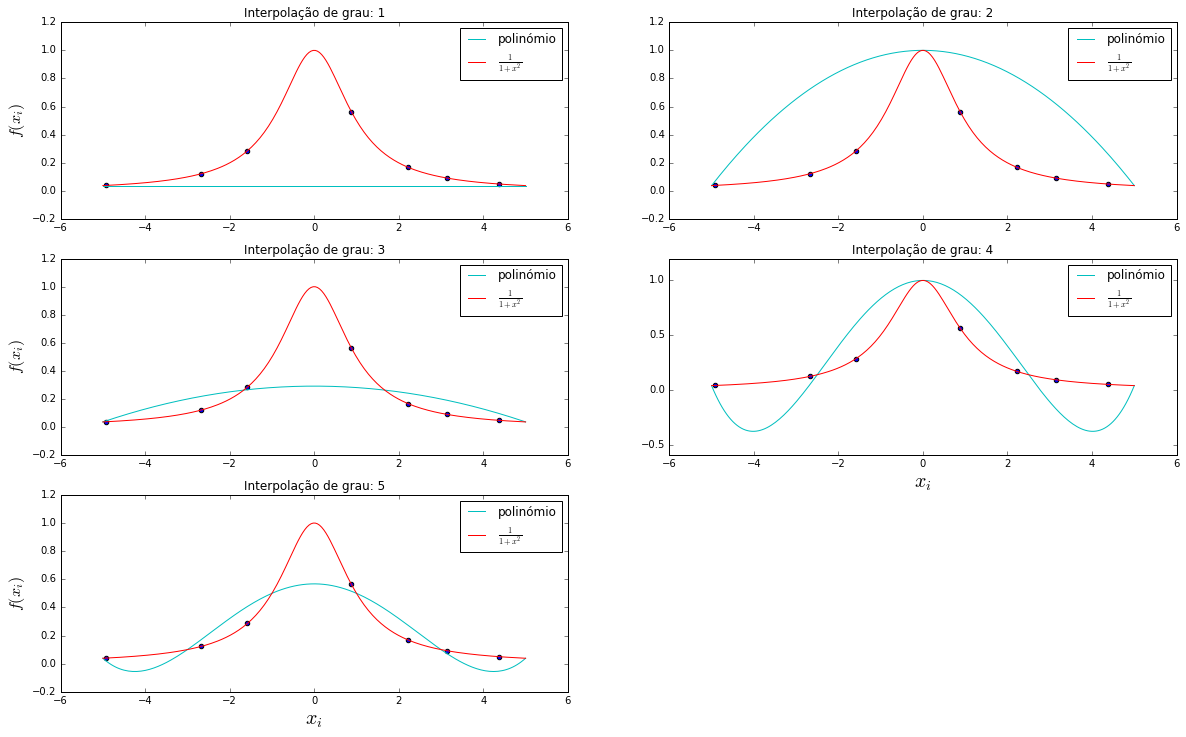

In [4]:
fig = plt.figure(figsize= (20, 12))
x_span = np.linspace(-5, 5, num = 200)

x_set = [-4.92, -2.67, -1.58, 0.88, 2.22, 3.14, 4.37]
y_set = list(map(func_x, x_set))

for i in range(1, 6):
    x_p = xinterval(-5, 5, i+1)
    y_p = func_x(x_p)
    y_gen, y_poli = newtoninterp(x_p, y_p, x_span)
    ip = fig.add_subplot(3, 2, i)
    ip.set_title('Interpolação de grau: ' + str(i))
    print('Coeficientes da Interpolação de grau ' + str(i) + ':')
    s=''
    for p in range(0, len(y_poli)): s += 'C' + str(p) + ': ' + str(y_poli[p]) + ';  '
    print(s)
    #plt.scatter(x_p, y_p)
    plt.plot(x_span, y_gen, 'c' , label = 'polinómio')
    plt.plot(x_span, func_x(x_span), 'r', label = r'$\frac{1}{1+x^{2}}$') # original function
    plt.scatter(x_set, y_set)
    if i == 4 or i == 5: plt.xlabel('$x_{i}$', size=20)
    if i %2 != 0: plt.ylabel('$f(x_{i})$', size = 16)
    plt.legend(loc='best')
    # plt.plot(x_span, exact_gen)
plt.show()

Para um polinómio de grau 20, observa-se um óptimo ajuste em volta dos pontos centrais,
e uma oscilação imensa nos pontos junto aos extremos iniciais e finais, o que é efectivamente um mau resultado.

Isto permite verificar, como esperado, o fenómeno de Runge.

Nos pontos $x = -4.75$ e $x = 4.8$ encontramos as oscilações que fogem muito ao valor real. 

Coeficientes da Interpolação:
C0: 0.0384615384615
C1: 0.0171945701357
C2: 0.00633484162896
C3: 0.00228805600615
C4: 0.0008537522411
C5: 0.000332080182055
C6: 0.00012812171563
C7: 3.57987146613e-05
C8: -1.93124644883e-05
C9: -5.1813929115e-05
C10: -6.59450006918e-06
C11: 4.40889433197e-05
C12: -2.97694574552e-05
C13: 9.33375394407e-06
C14: -5.79736269818e-07
C15: -9.27578031709e-07
C16: 5.68141544422e-07
C17: -2.08705057135e-07
C18: 5.86556696522e-08
C19: -1.36408534075e-08
C20: 2.7281706815e-09


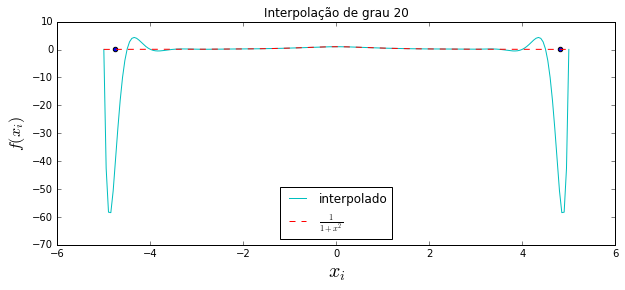

In [5]:
x_20 = xinterval(-5, 5, 21)
y_20 = list(map(func_x, x_20))
evalx_20 = [-4.75, 4.8]
evaly_20 = list(map(func_x, evalx_20))
pol_20, lpol_20 = newtoninterp(x_20, y_20, x_span)
print('Coeficientes da Interpolação:')
for p in range(0, len(lpol_20)): print('C' + str(p) + ': ' + str(lpol_20[p]))
fig = plt.figure(figsize = (10, 4))
i20 = fig.add_subplot(111)

i20.set_title('Interpolação de grau 20')
plt.plot(x_span, pol_20, 'c', label = 'interpolado')
plt.plot(x_span, func_x(x_span), 'r' '--' , label = r'$\frac{1}{1+x^{2}}$')
plt.scatter(evalx_20, evaly_20)
plt.xlabel('$x_{i}$', size=20)
plt.ylabel('$f(x_{i})$', size = 16)
plt.legend(loc = 'best')
plt.show()

# 2. #

O índice de refracção do poliestireno, medido para diferentes
comprimentos de onda $\lambda $ (correspondentes às riscas intensas do
espectro de sódio) é dado pela tabela seguinte:

| $\lambda (\mathring A)$ | 4358 | 4861 | 5896 | 6563 | 7679 |
|---------|--------|--------|--------|--------|--------|
| n | 1.6174 | 1.6062 | 1.5923 | 1.5870 | 1.5812 |

In [6]:
wl = [4358, 4861, 5896, 6563, 7679]             # wavelength
n_wl = [1.6174, 1.6062, 1.5923, 1.5870, 1.5812] # n for each wavelength

Implementa-se o método de Polinómio Interpolador pelo método de Lagrange:

In [7]:
def Lagrangepolinterp(x, y, x_new):
    n = len(x)
    y_new = []
    for x_n in x_new:
        lag_pols = []
        for i in range(n):
            l = 1
            for k in range(n):
                if k != i:
                    l *= (x_n - x[k]) / (x[i] - x[k])
            lag_pols.append(l)

        point = 0
        for i, j in zip(y, lag_pols):
            point += i * j
        y_new.append(point)
    return y_new

Tal como para o caso do Método de Interpolação de Newton, confirma-se que o método de Interpolação de Lagrange (polinómico) implementado se comporta conforme o esperado.

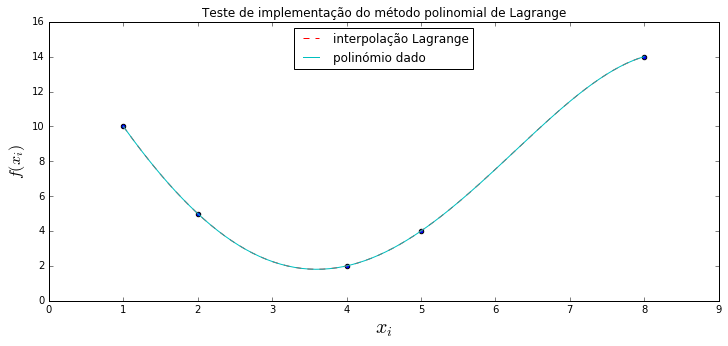

In [8]:
lag_pol_test = Lagrangepolinterp(test_x, test_y, plot_x_range)
plt.figure(figsize=(12, 5))
plt.plot(plot_x_range, lag_pol_test, 'r' '--', label = 'interpolação Lagrange')
plt.plot(plot_x_range, pol_dado(plot_x_range), 'c' '-', label = 'polinómio dado')
plt.scatter(test_x, test_y)
plt.legend(loc='upper center')
plt.title('Teste de implementação do método polinomial de Lagrange')
plt.xlabel('$x_{i}$', size=20)
plt.ylabel('$f(x_{i})$', size = 16)

plt.show()

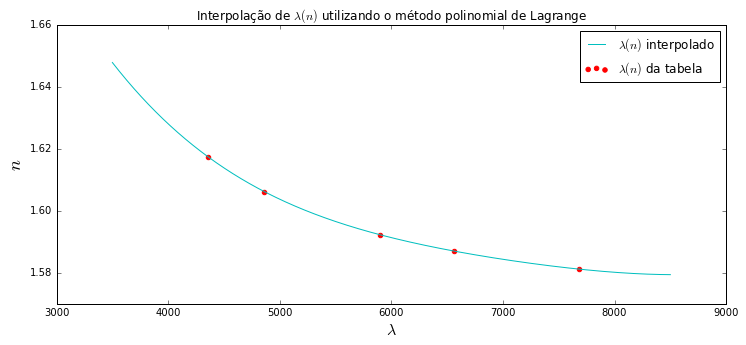

In [9]:
x_in, x_fi, dx = 3500, 8500, 0.01   #intervalo de pontos entre 3000 e 9000 a cada 0.01
wl_range = np.arange(x_in, x_fi, dx)
n_refr = Lagrangepolinterp(wl, n_wl, wl_range)
plt.figure(figsize = (12,5))
plt.scatter(wl, n_wl, color = 'red', label = '$\lambda (n)$ da tabela')
plt.plot(wl_range, n_refr, 'c', label = '$\lambda (n)$ interpolado')
plt.title('Interpolação de $\lambda (n)$ utilizando o método polinomial de Lagrange')
plt.xlabel('$\lambda$', size=16)
plt.ylabel('$n$', size=18)
plt.legend(loc='upper right')
plt.show()

Utilizando o polinómio interpolador pelo método de Lagrange, determina-se o índice de refracção para $\lambda = 5000 \mathring A$ como:

In [10]:
n_5000 = n_refr[int((5000 - x_in) / dx)]
print(n_5000)

1.60372980724
